In [1]:
import scipy as sp
import numpy as np
import scipy.sparse as sparse
import scipy.sparse.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def hnorm(r):
    """define ||r||_h = h ||r||_2"""
    n = len(r)
    h = 1.0 / (n+1)
    hrnorm = h * np.linalg.norm(r)
    return hrnorm

In [3]:
def poissonop(n):
    A = (n+1)**2 * sparse.diags([-1, 2, -1], [-1, 0, 1], shape=(n,n), format='csr')
    return A

In [32]:
def relax(A, u, f, nu):
    n = A.shape[0]
    Dinv = 1.0 / (2.0 * (n+1)**2)
    omega = 2.0 / 3.0
    for steps in range(nu):
        u += omega * Dinv * (f - A * u)

In [5]:
def interpolate(uc):
    """interpolate u of size 2**(k-1)-1 to 2**(k)-1"""
    nc = len(uc)
    nf = 2**(int(np.log2(nc+1))+1)-1
    uf = np.zeros((nf,))
    I = np.arange(1,nf,2)
    uf[I-1] = 0.5 * uc
    uf[I] = uc
    uf[I+1] += 0.5 * uc
    return uf

In [6]:
def restrict(uf):
    """restrict u of size 2**(k)-1 to 2**(k-1)-1"""
    nf = len(uf)
    nc = 2**(int(np.log2(nf+1))-1)-1
    uc = np.zeros((nc,))
    I = np.arange(1,nf,2)
    uc = 0.25 * uf[I-1] + 0.5 * uf[I] + 0.25 * uf[I+1]
    return uc

[0, 1, 0, 1]

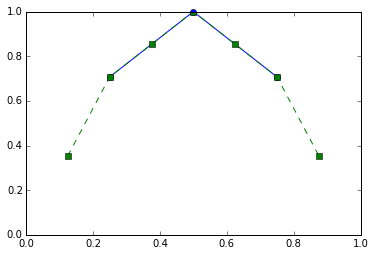

In [11]:
k=3
nc = 2**(k-1)-1
nf = 2**(k)-1
xc = np.linspace(0,1,nc+2)[1:-1]
xf = np.linspace(0,1,nf+2)[1:-1]

uc = np.sin(xc*np.pi)
uf = interpolate(uc)

plt.plot(xc, uc, 'b-o', clip_on=False)
plt.plot(xf, uf, 'g--s')
plt.axis([0,1,0,1])

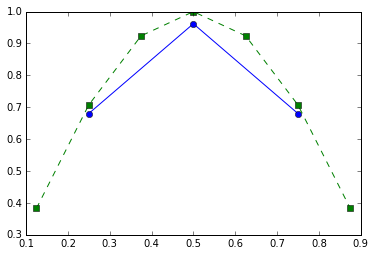

In [8]:
uf = np.sin(xf*np.pi)
uc = restrict(uf)

plt.plot(xc, uc, 'b-o')
plt.plot(xf, uf, 'g--s')

size = 4095


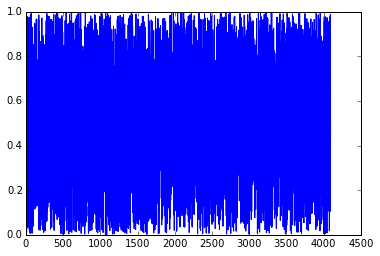

In [17]:
k = 12
n = 2**k - 1
print("size = %d" % n)
u = np.random.rand(n)
xx = np.linspace(0,1,n+2)[1:-1]

#f = np.random.rand(n)#np.pi**2 * np.sin(np.pi*xx)
A = poissonop(n)
f = A * np.random.rand(n)
ustar = sla.spsolve(A, f) 

plt.plot(ustar)

259490.062546
18545.6222143


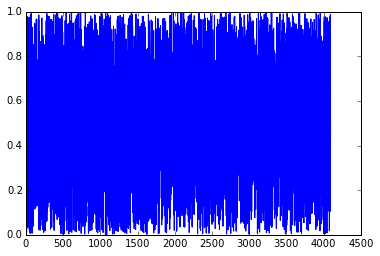

In [18]:
print(hnorm(f - A * u))
relax(A, u, f, 1)
rc = restrict(f - A * u)
Ac = poissonop(len(rc))
ec = sparse.linalg.spsolve(Ac, rc)
ef = interpolate(ec)
u = u + ef
relax(A, u, f, 1)
print(hnorm(f - A * u))
ustar = sla.spsolve(A, f)
plt.plot(ustar)

In [37]:
u = np.random.rand(n)
res = [(1.0 / (n+1)) * np.linalg.norm(f - A * u)]
print("res[0] = %g"%res[-1])
for cycle in range(10):
    relax(A, u, f, 10)
    rc = restrict(f - A * u)
    ec = sparse.linalg.spsolve(poissonop(len(rc)), rc)
    ef = interpolate(ec)
    u = u + ef
    relax(A, u, f, 10)
    res.append((1.0 / (n+1)) * np.linalg.norm(f - A * u))
    print("res[%d] = %g"%(cycle+1,res[-1]))

res[0] = 264885
res[1] = 97.0934
res[2] = 0.933004
res[3] = 0.0106196
res[4] = 0.000128467
res[5] = 1.59952e-06
res[6] = 2.02398e-08
res[7] = 2.60201e-10
res[8] = 1.82115e-11
res[9] = 1.76562e-11
res[10] = 1.76318e-11


In [38]:
res = np.array(res)
res[1:]/res[:-1]

array([  3.66549864e-04,   9.60934709e-03,   1.13821317e-02,
         1.20971913e-02,   1.24508104e-02,   1.26536975e-02,
         1.28559097e-02,   6.99901926e-02,   9.69507276e-01,
         9.98616220e-01])

In [ ]:
plt.plot(u)